Prepare Data for Classifier
===


In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
import pickle
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.model_selection import train_test_split

### Load data set with two classes: vehicles and non-vehicles

In [2]:
# Load data from different sets
cars = glob.glob('./vehicles/GTI_Far/*.png')
cars += glob.glob('./vehicles/GTI_MiddleClose/*.png')
cars += glob.glob('./vehicles/GTI_Left/*.png')
cars += glob.glob('./vehicles/GTI_Right/*.png')
cars += glob.glob('./vehicles/KITTI_extracted/*.png')
notcars = glob.glob('./non-vehicles/Extras/*.png')
notcars += glob.glob('./non-vehicles/GTI/*.png')

### Two classes are quite balanced

In [3]:
print('Number of samples in cars set: ', len(cars))
print('Number of samples in notcars set: ', len(notcars))

Number of samples in cars set:  8792
Number of samples in notcars set:  8968


### Split data set to 70% train, 20% validation and 10% test sets

In [4]:
# NOT USED!!!!
# Split input data list to train, validation and test sets.
# Returns: train set, validation set, test set.
def split_data_set(data, frac_train=0.7, frac_val=0.2, frac_test=0.1):
    n_train = np.int(frac_train * len(data))
    n_val = np.int((frac_train + frac_val) * len(data))
    data_train = data[:n_train]
    data_val = data[n_train:n_val]
    data_test = data[n_val:]
    return data_train, data_val, data_test
    
cars_train, cars_val, cars_test = split_data_set(cars)
notcars_train, notcars_val, notcars_test = split_data_set(notcars)

print('Number of samples in cars training set: ', len(cars_train))
print('Number of samples in cars validation set: ', len(cars_val))
print('Number of samples in cars test set: ', len(cars_test))
assert((len(cars_train) + len(cars_val) + len(cars_test)) == len(cars))

print('Number of samples in notcars training set: ', len(notcars_train))
print('Number of samples in notcars validation set: ', len(notcars_val))
print('Number of samples in notcars test set: ', len(notcars_test))
assert((len(notcars_train) + len(notcars_val) + len(notcars_test)) == len(notcars))

Number of samples in cars training set:  6154
Number of samples in cars validation set:  1758
Number of samples in cars test set:  880
Number of samples in notcars training set:  6277
Number of samples in notcars validation set:  1794
Number of samples in notcars test set:  897


### Save cars and notcars sets to pickle file

In [5]:
data_file = 'data.p'
print('Saving data to pickle file...')
try:
    with open(data_file, 'wb') as pfile:
        pickle.dump(
            {
                'cars': cars,
                'notcars': notcars,
            },
            pfile, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.


### Vehicle and Non-Vehicle examples

In [6]:
# Load data from pickle file data.p
data_file = 'data.p'
with open(data_file, mode='rb') as f:
    data = pickle.load(f)
cars = data['cars']
notcars = data['notcars']
print('Number of samples in cars set: ', len(cars))
print('Number of samples in notcars set: ', len(notcars))

Number of samples in cars set:  8792
Number of samples in notcars set:  8968


In [7]:
# Read in car / not-car images
car_ind = 100
notcar_ind = 10
car_image = plt.imread(cars[car_ind])
notcar_image = plt.imread(notcars[notcar_ind])
print('a car: ', cars[car_ind])
print('not a car :', notcars[notcar_ind])

a car:  ./vehicles/GTI_Far\image0151.png
not a car : ./non-vehicles/Extras\extra1007.png


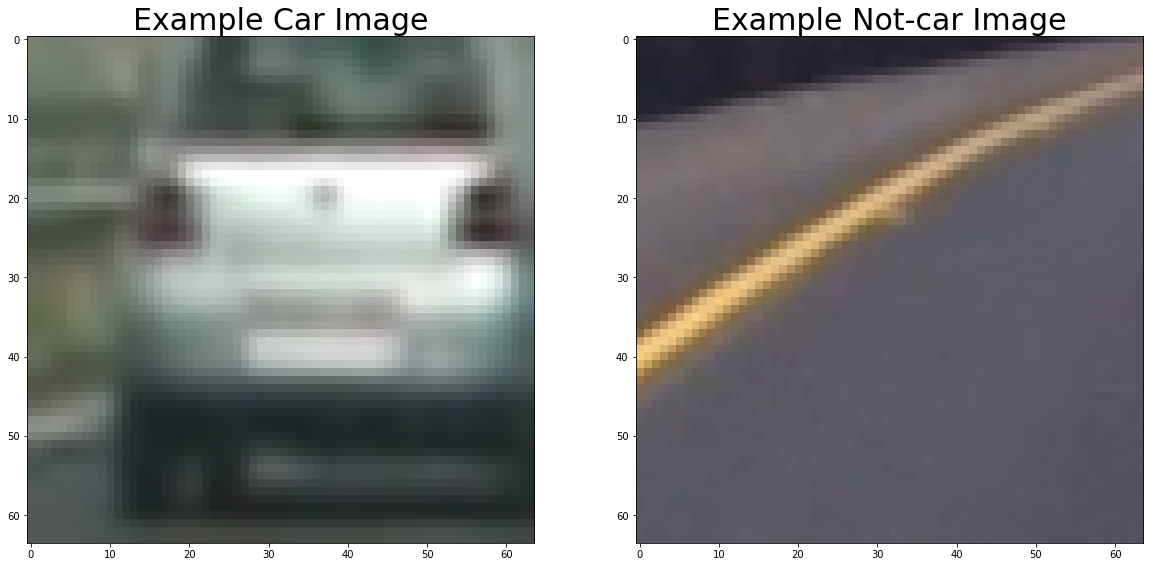

In [8]:
# Plot the examples
font_size=30
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Example Car Image', fontsize=font_size)
ax1.imshow(car_image)
ax2.imshow(notcar_image)
ax2.set_title('Example Not-car Image', fontsize=font_size)
plt.show()